In [16]:
#imp[orting the libraries we would use
import tensorflow as tf
import matplotlib.pyplot as plt

For this practise, we will use the mnist dataset from the keras library.

In [17]:
#To get our dataset, 
data = tf.keras.datasets.mnist

**Unpackig the images and digits **

In [18]:
(X_train,y_train),(X_test, y_test) = data.load_data()

# **Getting to know the dataset**

In [19]:
X_train.shape

(60000, 28, 28)

This means that we have 60,000 images for training with each image having a dimension of 28 by 28 (28 height, 28 width).

In [20]:
X_test.shape

(10000, 28, 28)

This means that we have 60,000 images for testing with each image having a dimension of 28 by 28 (28 height, 28 width).

In [21]:
#getting to knowthe type of our image
X_train.dtype

dtype('uint8')

we can see that the type of our train data(image) is "uint8" which means that the daa is a grey image(a clored image having color scale between 1 and 255)

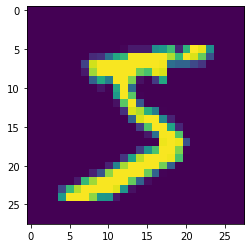

In [22]:
#we can view the images in our dataset using the imshow function.
plt.imshow(X_train[0])

Imshow takes the numpy array of the images and turns it into the image. We can see from the above that the first image in our dataset is a five.

# **Image Preprocessing**

Beforwe build our model, it is necessary to normalise the images as this will accelartae the learning process. We can do this usig the min/max normalisation techiques.

Since we know thatour image is a grey scavle image with a range from1 to 255, the mi/max normalisatio gives us a values withi the rageof 0 to 1, we can achieve this normalisatiocan in two ways 
- Manually dividing the highest and lowest value by hightest value in the scale
e.g (0/255) = 0 and (225/225) = 1
- usig the utilse mormalisation function in keras

In [23]:
#we will do it the manual way
X_train_scaled = X_train/255

In [24]:
X_test_scaled = X_test/255

# **Model Building**

SInce the image we are dealing with is complex, we will e usigthe Convolutional Neural Network. its architecture is as below,
- having the first covolutional layer, which tries to help detect the edges of the images. It accepts;
  1)input_shape: which is the shape of the image(28,28,1),
  2)filters: whichg act like detectors in detecting images. the higher we go, the filters will e icreased, 
  3)kernel_size is the size we want our filters to be and 
  4) the activation fuctio we will be usig is the relu
- A Maxpooling area  which tries to minize the pixels in the image and also detects more complex patterns on the image.

Note: the convolutional and maxpoolig layers will be doubled then after that, we will have our flatteing layer which transforms our 2D image into a 1d array image.

After the flatteing layer, we will have the hidden layers which will trasfrom our image.

In [25]:
model = tf.keras.models.Sequential([  #the sequential functio accepts everything we have to uild our model
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3,3), activation="relu"),  #first CNN layer
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),   #first maxpooling layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),  #second convolutional layer
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),  #second maxpooling layer
    
    tf.keras.layers.Flatten(),   #flateening layer
    tf.keras.layers.Dense(units=256, activation="relu"),  #first hidden layer
    tf.keras.layers.Dense(units=128, activation="relu"),   #second hidde layer
    tf.keras.layers.Dense(units=10, activation="softmax")  #output layer
])

The next thing to do is to complie our model. 

In [26]:
model.compile(optimizer ="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics="accuracy")

 The summary helps us prit useful summary of the model which includes:
Name and type of all layers in the model, output shape for each layer, number of weight parameters of each layer and the total number of trainable and non-trainable parameters of the model.

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

# **Training Our Model**

to train our model, we need to fit the model to the X train. Then, we specifythe validation_data to show us how the model performs at each epoch.

In [30]:
model.fit(X_train_scaled, y_train,validation_data = (X_test,y_test), epochs =3)

Epoch 1/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1231 - accuracy: 0.9617 - val_loss: 5.1760 - val_accuracy: 0.9885
Epoch 2/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 7.4930 - val_accuracy: 0.9878
Epoch 3/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 8.4152 - val_accuracy: 0.9872


We can see that our model is performing well at every stage of the epoch